In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DS/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


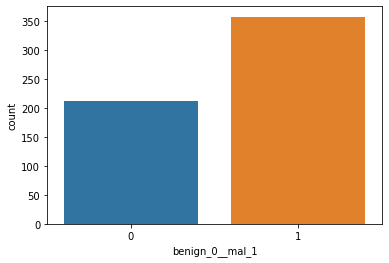

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

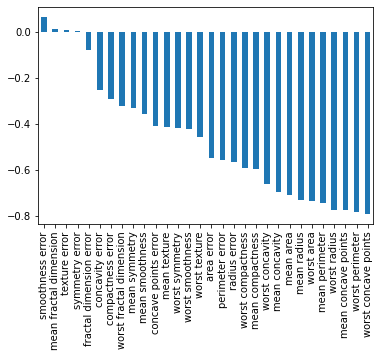

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=False).plot(kind='bar')

In [12]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6733 - val_loss: 0.6498
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6358 - val_loss: 0.6086
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5897 - val_loss: 0.5553
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5325 - val_loss: 0.4897
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4687 - val_loss: 0.4243
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4094 - val_loss: 0.3699
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3592 - val_loss: 0.3243
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3193 - val_loss: 0.2867
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2878 - val_loss: 0.2584
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2646 - val_loss: 0.2387
Epoch 11

In [26]:
loses=pd.DataFrame(model.history.history)

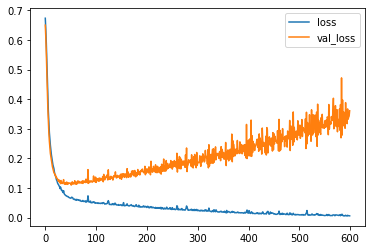

In [27]:
loses.plot()

In [28]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop=EarlyStopping(monitor='val_loss',
                         mode='min',verbose=1,
                         patience=25)

In [34]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7034 - val_loss: 0.6843
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6712 - val_loss: 0.6524
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6327 - val_loss: 0.6083
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5900 - val_loss: 0.5636
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5435 - val_loss: 0.5174
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4985 - val_loss: 0.4696
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4539 - val_loss: 0.4255
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4086 - val_loss: 0.3801
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3687 - val_loss: 0.3387
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3325 - val_loss: 0.3009
Epoch 11

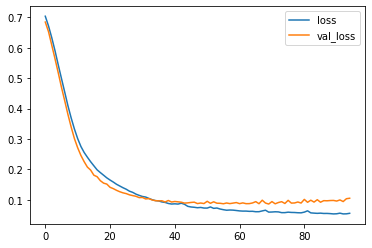

In [36]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
from tensorflow.keras.layers import Dropout

model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7219 - val_loss: 0.6911
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6910 - val_loss: 0.6808
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6763 - val_loss: 0.6707
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6676 - val_loss: 0.6552
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6372 - val_loss: 0.6331
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6207 - val_loss: 0.6138
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6164 - val_loss: 0.5931
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6062 - val_loss: 0.5750
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5805 - val_loss: 0.5542
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5596 - val_loss: 0.5296
Epoch 11

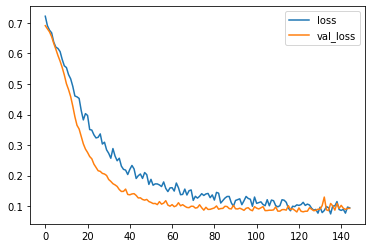

In [39]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [41]:
predictions = (model.predict(X_test) > 0.5)*1  

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [44]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
